# [Entrega #2] Preprocesamiento de Datos


## Descripción
En este proyecto, realizamos un preprocesamiento de los datos proporcionados. El objetivo es preparar los datos para el modelado posterior, rellenando valores faltantes, detectando y corrigiendo valores atu00edpicos, normalizando y escalando los datos, codificando variables categu00f3ricas y creando variables adicionales para mejorar el modelado.

## Objetivos
- Identificar y rellenar valores faltantes
- Detectar y corregir valores atipicos (outliers)
- Normalizar y escalar los datos
- Codificar variables categorizar
- Crear variables adicionales para mejorar el modelado

## Metodología de Preprocesamiento

### 1. Carga y Exploración Inicial de Datos
- Cargamos los conjuntos de datos de entrenamiento y prueba
- Examinamos la estructura general de los datos (dimensiones, tipos de datos)
- Identificamos columnas categóricas y numéricas
- Analizamos la presencia de valores faltantes

### 2. Tratamiento de Valores Faltantes
- Identificamos columnas con valores faltantes
- Para variables numéricas: imputamos con la media de la columna
- Para variables categóricas: imputamos con la moda (valor más frecuente)
- Verificamos que no queden valores faltantes en el conjunto de datos

### 3. Detección y Tratamiento de Outliers
- Utilizamos el método del Rango Intercuartil (IQR)
- Calculamos los límites inferior y superior (Q1 - 1.5*IQR y Q3 + 1.5*IQR)
- Identificamos valores fuera de estos lu00edmites
- Aplicamos tu00e9cnicas de recorte (capping) para limitar los valores extremos

### 4. Codificación de Variables Categoricas
- Identificamos todas las variables categoricas
- Aplicamos codificación one-hot (variables dummy)
- Eliminamos una categoría de referencia para evitar multicolinealidad (drop_first=True)
- Aseguramos que el conjunto de prueba tenga las mismas columnas que el de entrenamiento

### 5. Normalización de Variables Numéricas
- Aplicamos normalización min-max para escalar todas las variables numéricas al rango [0,1]
- Utilizamos los valores mínimo y máximo del conjunto de entrenamiento para normalizar también el conjunto de prueba
- Verificamos que todas las variables estén correctamente escaladas

## Datos
Los datos contienen información sobre rendimiento académico clasificado en diferentes categorías (bajo, medio-bajo, medio-alto, alto), junto con diversas variables predictoras que pueden influir en dicho rendimiento.

## Implementación
Todo el proceso de preprocesamiento está implementado en el notebook **02 - preprocesado.ipynb**, que incluye:

- Funciones modulares para cada paso del preprocesamiento
- Visualizaciones para entender mejor los datos
- Verificaciones en cada etapa para garantizar la calidad de los datos
- Flujo paso a paso para mayor claridad y control del proceso

## Video de Avance del Proyecto
[Enlace al video en YouTube](https://www.youtube.com/watch?v=XXXX) - Este video explica el estado actual del proyecto, las dificultades encontradas y los próximos pasos a seguir.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 1. Cargar los datos
def cargar_datos(ruta_train):
    """
    Carga el conjunto de datos de entrenamiento desde un archivo CSV.
    
    Args:
        ruta_train (str): Ruta al archivo CSV de entrenamiento
        
    Returns:
        pandas.DataFrame: DataFrame de entrenamiento
    """
    train_df = pd.read_csv(ruta_train)
    
    print(f"Forma de los datos de entrenamiento: {train_df.shape}")
    
    return train_df

train_df = cargar_datos('Data/train.csv')
test_df =  cargar_datos('Data/test.csv')

Forma de los datos de entrenamiento: (692500, 21)
Forma de los datos de entrenamiento: (296786, 20)
Forma de los datos de entrenamiento: (296786, 20)


In [19]:
display(train_df.head())
display(test_df.head())


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


In [5]:
import pandas as pd
import numpy as np

def imputar_datos_faltantes(df):
    """
    Imputa valores faltantes en un DataFrame de forma eficiente:
    - Si una fila tiene 2 o menos NaNs, imputa con media (numérico) o moda (categórico).
    - Si una fila tiene más de 2 NaNs, elimina esa fila.
    - Reemplaza strings vacíos en columnas categóricas por la moda.
    - Para variables numéricas: usa la MEDIA
    - Para variables categóricas: usa la MODA
    """
    df_limpio = df.copy()
    
    print("=== IMPUTACIÓN DE VALORES FALTANTES ===")
    print(f"DataFrame original: {df.shape[0]} filas, {df.shape[1]} columnas")
    
    # Mostrar valores faltantes iniciales
    valores_faltantes_inicial = df_limpio.isnull().sum()
    if valores_faltantes_inicial.sum() > 0:
        print("\n📊 Valores faltantes por columna (antes):")
        for col, count in valores_faltantes_inicial[valores_faltantes_inicial > 0].items():
            print(f"  {col}: {count} valores faltantes")

    # 1. Eliminar filas con más de 2 NaNs
    mask_filas_validas = df_limpio.isnull().sum(axis=1) <= 2
    n_filas_eliminadas = (~mask_filas_validas).sum()
    df_limpio = df_limpio[mask_filas_validas].copy()
    
    if n_filas_eliminadas > 0:
        print(f"\n🗑️ Filas eliminadas por tener más de 2 NaNs: {n_filas_eliminadas}")

    # 2. Identificar columnas numéricas y categóricas
    columnas_numericas = df_limpio.select_dtypes(include=[np.number]).columns
    columnas_categoricas = df_limpio.select_dtypes(exclude=[np.number]).columns
    
    # 3. Calcular MEDIAS para columnas numéricas
    if len(columnas_numericas) > 0:
        medias = df_limpio[columnas_numericas].mean()
        print(f"\n📈 Imputando {len(columnas_numericas)} columnas numéricas con MEDIA:")
        for col in columnas_numericas:
            valores_faltantes = df_limpio[col].isnull().sum()
            if valores_faltantes > 0:
                media_valor = medias[col]
                df_limpio[col] = df_limpio[col].fillna(media_valor)
                print(f"  ✓ {col}: {valores_faltantes} valores → Media = {media_valor:.2f}")

    # 4. Calcular MODAS para columnas categóricas
    if len(columnas_categoricas) > 0:
        print(f"\n📊 Imputando {len(columnas_categoricas)} columnas categóricas con MODA:")
        for col in columnas_categoricas:
            # Primero reemplazar strings vacíos por NaN
            df_limpio[col] = df_limpio[col].replace('', np.nan)
            
            valores_faltantes = df_limpio[col].isnull().sum()
            if valores_faltantes > 0:
                # Calcular moda (valor más frecuente)
                moda_serie = df_limpio[col].mode()
                if len(moda_serie) > 0:
                    moda_valor = moda_serie.iloc[0]
                else:
                    moda_valor = 'Desconocido'  # Fallback si no hay moda
                
                df_limpio[col] = df_limpio[col].fillna(moda_valor)
                print(f"  ✓ {col}: {valores_faltantes} valores → Moda = '{moda_valor}'")

    # 5. Verificación final
    total_nans_final = df_limpio.isnull().sum().sum()
    print(f"\n✅ RESULTADO FINAL:")
    print(f"   Filas finales: {df_limpio.shape[0]}")
    print(f"   Valores faltantes restantes: {total_nans_final}")
    
    if total_nans_final == 0:
        print("   🎉 ¡PERFECTO! No quedan valores faltantes.")
    else:
        print("   ⚠️ Aún hay valores faltantes. Revisa:")
        valores_restantes = df_limpio.isnull().sum()
        for col, count in valores_restantes[valores_restantes > 0].items():
            print(f"     {col}: {count} valores faltantes")

    return df_limpio

# Aplicar imputación al conjunto de entrenamiento
print("🔄 PROCESANDO CONJUNTO DE ENTRENAMIENTO...")
train_df_imputado = imputar_datos_faltantes(train_df)
display(train_df_imputado.head())

# También procesar el conjunto de prueba (descomenta si lo necesitas)
# print("\n🔄 PROCESANDO CONJUNTO DE PRUEBA...")
# test_df_imputado = imputar_datos_faltantes(test_df)
# display(test_df_imputado.head())

🔄 PROCESANDO CONJUNTO DE ENTRENAMIENTO...
=== IMPUTACIÓN DE VALORES FALTANTES ===
DataFrame original: 692500 filas, 21 columnas

📊 Valores faltantes por columna (antes):
  ESTU_VALORMATRICULAUNIVERSIDAD: 6287 valores faltantes
  ESTU_HORASSEMANATRABAJA: 30857 valores faltantes
  FAMI_ESTRATOVIVIENDA: 32137 valores faltantes
  FAMI_TIENEINTERNET: 26629 valores faltantes
  FAMI_EDUCACIONPADRE: 23178 valores faltantes
  FAMI_TIENELAVADORA: 39773 valores faltantes
  FAMI_TIENEAUTOMOVIL: 43623 valores faltantes
  ESTU_PAGOMATRICULAPROPIO: 6498 valores faltantes
  FAMI_TIENECOMPUTADOR: 38103 valores faltantes
  FAMI_TIENEINTERNET.1: 26629 valores faltantes
  FAMI_EDUCACIONMADRE: 23664 valores faltantes

📊 Valores faltantes por columna (antes):
  ESTU_VALORMATRICULAUNIVERSIDAD: 6287 valores faltantes
  ESTU_HORASSEMANATRABAJA: 30857 valores faltantes
  FAMI_ESTRATOVIVIENDA: 32137 valores faltantes
  FAMI_TIENEINTERNET: 26629 valores faltantes
  FAMI_EDUCACIONPADRE: 23178 valores faltantes
  F

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [8]:
import pandas as pd
import numpy as np

def eliminar_outliers_iqr(df):
    """
    Elimina filas de un DataFrame que contienen outliers en columnas numéricas, 
    basado en el método del Rango Intercuartílico (IQR).

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame sin las filas que contenían outliers.
    """
    df_limpio = df.copy()
    resumen = []

    print("=== Eliminación de Outliers usando IQR ===")
    print(f"Tamaño original del DataFrame: {df.shape[0]} filas\n")

    numerical_cols = df.select_dtypes(include=np.number).columns

    if numerical_cols.empty:
        print("No se encontraron columnas numéricas. No se eliminaron outliers.")
        return df_limpio

    mascara_sin_outliers = pd.Series([True] * len(df_limpio), index=df_limpio.index)

    for col in numerical_cols:
        Q1 = df_limpio[col].quantile(0.25)
        Q3 = df_limpio[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_columna = (df_limpio[col] < lower_bound) | (df_limpio[col] > upper_bound)
        num_outliers_col = outliers_columna.sum()

        resumen.append({
            "Columna": col,
            "Q1": round(Q1, 2),
            "Q3": round(Q3, 2),
            "IQR": round(IQR, 2),
            "Límite Inferior": round(lower_bound, 2),
            "Límite Superior": round(upper_bound, 2),
            "Outliers Detectados": int(num_outliers_col)
        })

        if num_outliers_col > 0:
            mascara_sin_outliers = mascara_sin_outliers & (~outliers_columna)

    df_filtrado = df_limpio[mascara_sin_outliers]
    filas_eliminadas = len(df_limpio) - len(df_filtrado)

    # Mostrar resumen tabular
    resumen_df = pd.DataFrame(resumen)
    print("Resumen de outliers detectados por columna:")
    display(resumen_df.style.format({"Q1": "{:.2f}", "Q3": "{:.2f}", "IQR": "{:.2f}", "Límite Inferior": "{:.2f}", "Límite Superior": "{:.2f}"}))

    print(f"\nTotal de filas eliminadas por contener outliers: {filas_eliminadas}")
    print(f"Tamaño final del DataFrame: {df_filtrado.shape[0]} filas")
    print("=== Eliminación de outliers completada ===\n")

    return df_filtrado

# Uso:
train_df_sin_outliers = eliminar_outliers_iqr(train_df_imputado)
display(train_df_sin_outliers)

# Procesar también el conjunto de prueba
print("🔄 PROCESANDO CONJUNTO DE PRUEBA...")
test_df_imputado = imputar_datos_faltantes(test_df)
display(test_df_imputado.head())

# Verificar que ambos datasets tengan las mismas columnas y tipos
print("\n🔍 VERIFICACIÓN DE CONSISTENCIA ENTRE TRAIN Y TEST:")
print(f"Train shape: {train_df_imputado.shape}")
print(f"Test shape: {test_df_imputado.shape}")

# Verificar tipos de datos
train_types = train_df_imputado.dtypes
test_types = test_df_imputado.dtypes

tipos_diferentes = []
for col in train_df_imputado.columns:
    if col in test_df_imputado.columns:
        if train_types[col] != test_types[col]:
            tipos_diferentes.append((col, train_types[col], test_types[col]))

if tipos_diferentes:
    print("\n⚠️ Columnas con tipos diferentes:")
    for col, train_type, test_type in tipos_diferentes:
        print(f"  {col}: Train={train_type}, Test={test_type}")
else:
    print("\n✅ Todos los tipos de datos son consistentes entre train y test")

=== Eliminación de Outliers usando IQR ===
Tamaño original del DataFrame: 655787 filas

Resumen de outliers detectados por columna:


,Columna,Q1,Q3,IQR,Límite Inferior,Límite Superior,Outliers Detectados
0,ID,247289.50,741738.50,494449.00,-494384.00,1483412.00,0
1,PERIODO,20195.00,20203.00,8.00,20183.00,20215.00,0
2,coef_1,0.21,0.32,0.11,0.05,0.48,56624
3,coef_2,0.22,0.31,0.09,0.08,0.45,8853
4,coef_3,0.26,0.29,0.04,0.20,0.35,12641
5,coef_4,0.26,0.30,0.04,0.20,0.37,64556



Total de filas eliminadas por contener outliers: 76963
Tamaño final del DataFrame: 578824 filas
=== Eliminación de outliers completada ===



,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo,0.312,0.209,0.290,0.265
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287


🔄 PROCESANDO CONJUNTO DE PRUEBA...
=== IMPUTACIÓN DE VALORES FALTANTES ===
DataFrame original: 296786 filas, 20 columnas

📊 Valores faltantes por columna (antes):
  ESTU_VALORMATRICULAUNIVERSIDAD: 2723 valores faltantes
  ESTU_HORASSEMANATRABAJA: 13379 valores faltantes
  FAMI_ESTRATOVIVIENDA: 13795 valores faltantes
  FAMI_TIENEINTERNET: 11539 valores faltantes
  FAMI_EDUCACIONPADRE: 9993 valores faltantes
  FAMI_TIENELAVADORA: 17259 valores faltantes
  FAMI_TIENEAUTOMOVIL: 18918 valores faltantes
  ESTU_PAGOMATRICULAPROPIO: 2807 valores faltantes
  FAMI_TIENECOMPUTADOR: 16439 valores faltantes
  FAMI_TIENEINTERNET.1: 11539 valores faltantes
  FAMI_EDUCACIONMADRE: 10223 valores faltantes

🗑️ Filas eliminadas por tener más de 2 NaNs: 15837

📈 Imputando 6 columnas numéricas con MEDIA:

📊 Imputando 14 columnas categóricas con MODA:
  ✓ ESTU_VALORMATRICULAUNIVERSIDAD: 1904 valores → Moda = 'Entre 1 millón y menos de 2.5 millones'
  ✓ ESTU_HORASSEMANATRABAJA: 1661 valores → Moda = 'Más de 

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286



🔍 VERIFICACIÓN DE CONSISTENCIA ENTRE TRAIN Y TEST:
Train shape: (655787, 21)
Test shape: (280949, 20)

✅ Todos los tipos de datos son consistentes entre train y test


/tmp/ipykernel_122528/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
/tmp/ipykernel_122528/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
/tmp/ipykernel_122528/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
/tmp/ipykernel_122528/283330291.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since 

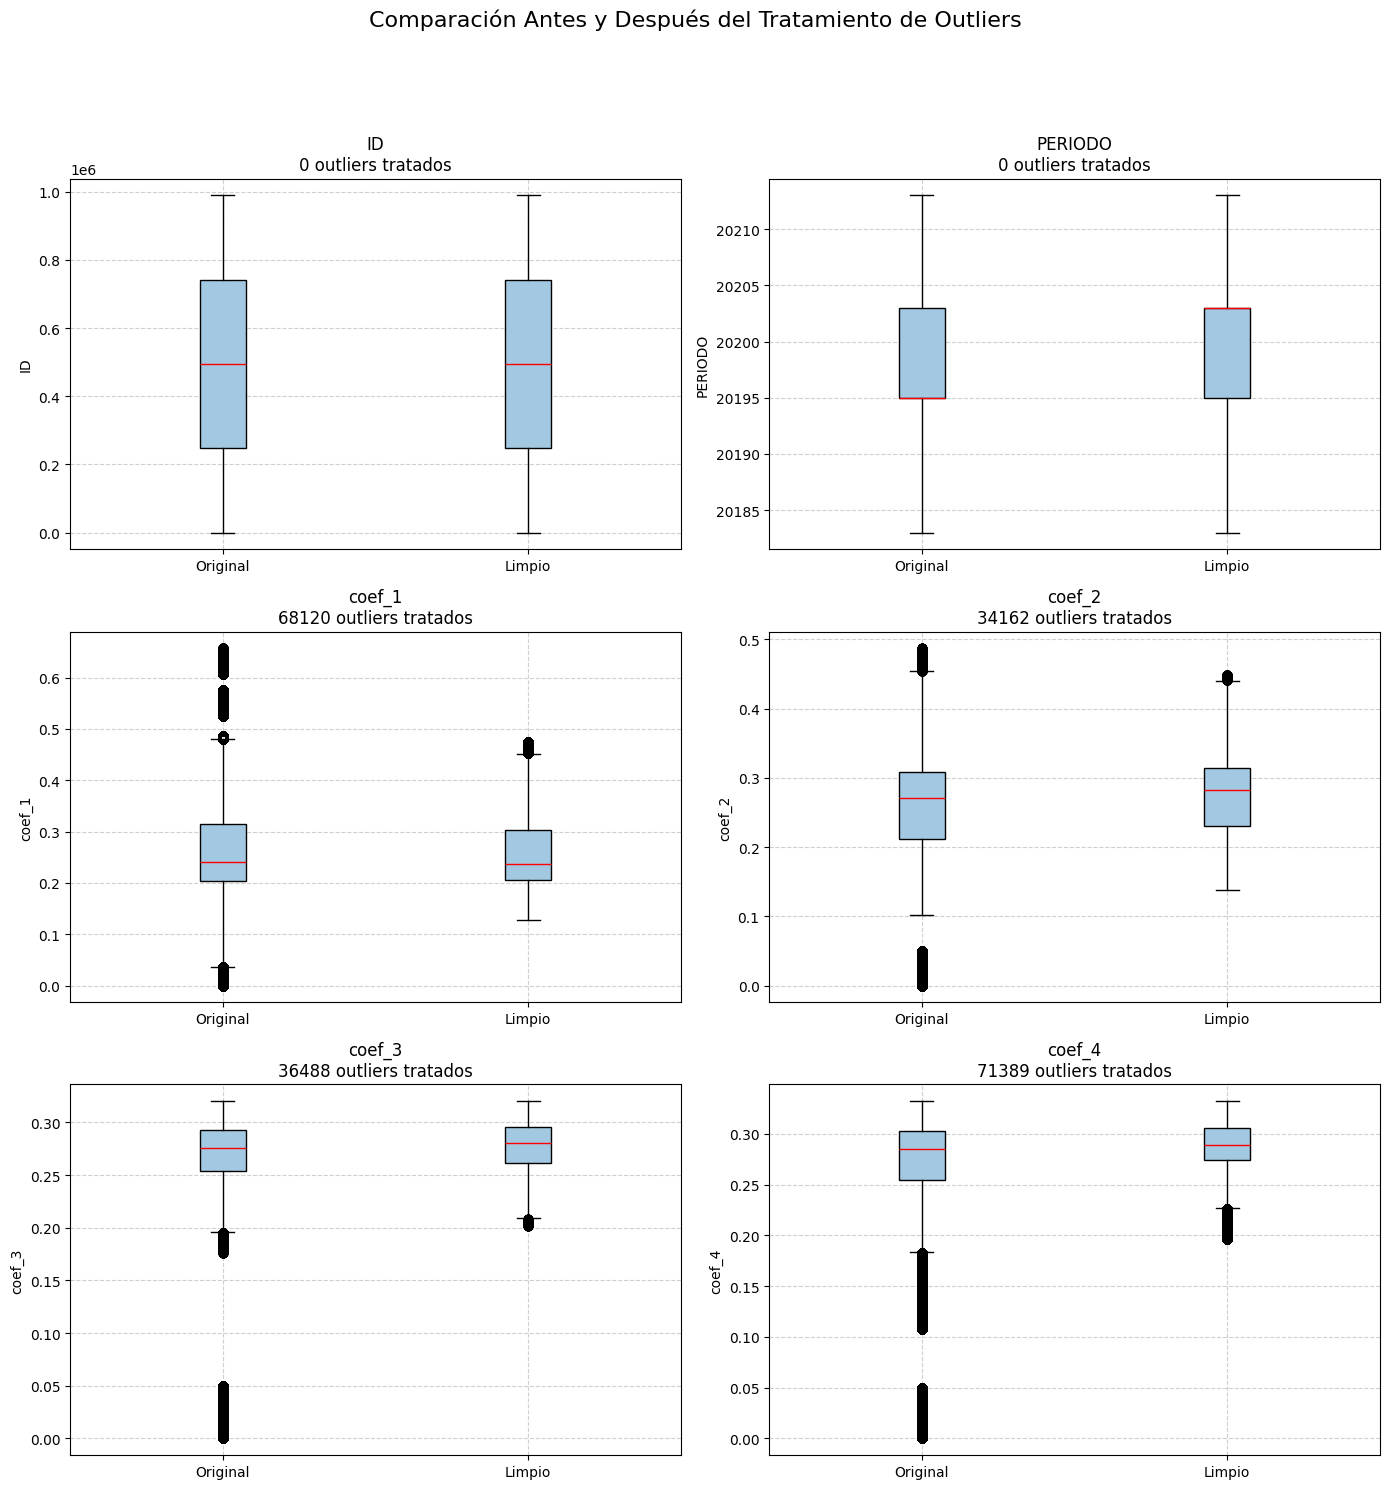


Resumen estadístico de columnas numéricas antes y después del tratamiento de outliers:


,Columna,Outliers,Outliers (%),Min Original,Max Original,Min Limpio,Max Limpio,Límite Inf.,Límite Sup.
0,ID,0,0.00%,1.0,989286.000,1.000,989286.000,-494361.88,1483469.12
1,PERIODO,0,0.00%,20183.0,20213.000,20183.000,20213.000,20183.00,20215.00
2,coef_1,68120,9.84%,0.0,0.657,0.128,0.475,0.04,0.48
3,coef_2,34162,4.93%,0.0,0.487,0.138,0.449,0.07,0.45
4,coef_3,36488,5.27%,0.0,0.320,0.202,0.320,0.20,0.35
5,coef_4,71389,10.31%,0.0,0.332,0.196,0.332,0.18,0.38


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def comparar_tratamiento_outliers(train_df, train_df_limpio, max_cols_por_fila=2):
    """
    Muestra una comparación visual y estadística de los datos antes y después del tratamiento de valores atípicos.
    Los boxplots se organizan de forma más clara y la tabla de resumen es más legible.
    """
    columnas_numericas = train_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = min(max_cols_por_fila, len(columnas_numericas))
    n_filas = int(np.ceil(len(columnas_numericas) / n_cols))

    fig, axes = plt.subplots(n_filas, n_cols, figsize=(7 * n_cols, 5 * n_filas))
    axes = np.array(axes).reshape(-1)  # Asegura que axes siempre sea 1D

    for i, col in enumerate(columnas_numericas):
        ax = axes[i]
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        cantidad_outliers = ((train_df[col] < limite_inferior) | (train_df[col] > limite_superior)).sum()

        datos_boxplot = [train_df[col], train_df_limpio[col]]
        ax.boxplot(datos_boxplot, labels=['Original', 'Limpio'], patch_artist=True,
                   boxprops=dict(facecolor='#a3c9e2'), medianprops=dict(color='red'))
        ax.set_title(f"{col}\n{cantidad_outliers} outliers tratados", fontsize=12)
        ax.set_ylabel(col)
        ax.grid(True, linestyle='--', alpha=0.6)
        stats_original = f"Min: {train_df[col].min():.2f}, Max: {train_df[col].max():.2f}"
        stats_limpio = f"Min: {train_df_limpio[col].min():.2f}, Max: {train_df_limpio[col].max():.2f}"
        ax.annotate(stats_original, xy=(0, 0), xytext=(0.5, -0.18), textcoords='axes fraction',
                    ha='center', fontsize=9)
        ax.annotate(stats_limpio, xy=(0, 0), xytext=(0.5, -0.28), textcoords='axes fraction',
                    ha='center', fontsize=9)

    # Oculta subgráficos no usados
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.suptitle('Comparación Antes y Después del Tratamiento de Outliers', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

    # Tabla de resumen estadístico
    resumen = []
    for col in columnas_numericas:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        cantidad_outliers = ((train_df[col] < limite_inferior) | (train_df[col] > limite_superior)).sum()
        porcentaje_outliers = (cantidad_outliers / len(train_df)) * 100
        resumen.append({
            'Columna': col,
            'Outliers': cantidad_outliers,
            'Outliers (%)': f"{porcentaje_outliers:.2f}%",
            'Min Original': train_df[col].min(),
            'Max Original': train_df[col].max(),
            'Min Limpio': train_df_limpio[col].min(),
            'Max Limpio': train_df_limpio[col].max(),
            'Límite Inf.': round(limite_inferior, 2),
            'Límite Sup.': round(limite_superior, 2)
        })
    df_resumen = pd.DataFrame(resumen)
    print("\nResumen estadístico de columnas numéricas antes y después del tratamiento de outliers:")
    display(df_resumen)

# Uso:
comparar_tratamiento_outliers(train_df, train_df_sin_outliers)

In [12]:
import pandas as pd
import re
import numpy as np

def convertir_estrato_a_numerico(df, columna='FAMI_ESTRATOVIVIENDA', crear_nueva_columna=False, prefijo_nueva_columna='NUM_', mapeo_personalizado=None):
    """
    Convierte una columna de estrato socioeconómico a valores numéricos.
    """
    df_resultado = df.copy()
    if isinstance(columna, str):
        columnas = [columna]
    else:
        columnas = columna

    def extraer_numero_estrato(valor):
        if pd.isna(valor):
            return np.nan
        if isinstance(valor, (int, float)):
            return valor
        if isinstance(valor, str):
            if mapeo_personalizado and valor in mapeo_personalizado:
                return mapeo_personalizado[valor]
            valor_lower = valor.lower()
            patrones = [
                r'estrato\s*(\d+)',
                r'est\.?\s*(\d+)',
                r'nivel\s*(\d+)',
                r'(\d+)',
            ]
            for patron in patrones:
                match = re.search(patron, valor_lower)
                if match:
                    try:
                        return int(match.group(1))
                    except ValueError:
                        continue
            if 'sin estrato' in valor_lower or 'no tiene' in valor_lower:
                return 0
            if 'rural' in valor_lower:
                return -1
        return np.nan

    for col in columnas:
        if col not in df_resultado.columns:
            continue
        col_destino = f"{prefijo_nueva_columna}{col}" if crear_nueva_columna else col
        df_resultado[col_destino] = df_resultado[col].apply(extraer_numero_estrato)
        df_resultado[col_destino] = pd.to_numeric(df_resultado[col_destino], errors='coerce')

    return df_resultado

# Aplica y reemplaza la columna original por la versión numérica
train_df_estrato_numerico = convertir_estrato_a_numerico(train_df_sin_outliers, crear_nueva_columna=False)
test_df_estrato_numerico = convertir_estrato_a_numerico(test_df, crear_nueva_columna=False)

display(train_df_estrato_numerico)
display(test_df_estrato_numerico)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,3,Si,Secundaria (Bachillerato) incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo,0.312,0.209,0.290,0.265
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,3.0,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,2.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,3.0,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,1.0,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,2.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,1.0,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,4.0,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,3.0,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260


In [13]:
import pandas as pd
import numpy as np
import re

def convertir_horas_semana(df, columna='ESTU_HORASSEMANATRABAJA'):
    """
    Convierte la columna de horas a la semana trabajadas a valores numéricos (valor medio del rango),
    reemplazando la columna original.
    """
    df_resultado = df.copy()
    def extraer_horas(valor):
        if pd.isna(valor) or valor == '':
            return np.nan
        if isinstance(valor, (int, float)):
            return valor
        valor = str(valor).strip().lower()
        if valor == '0':
            return 0
        if 'menos de 10 horas' in valor:
            return 5
        if 'entre 11 y 20 horas' in valor:
            return 15.5
        if 'entre 21 y 30 horas' in valor:
            return 25.5
        if 'más de 30 horas' in valor or 'mas de 30 horas' in valor:
            return 35
        # Si hay un rango explícito
        match = re.search(r'(\d+)\s*y\s*(\d+)', valor)
        if match:
            return (int(match.group(1)) + int(match.group(2))) / 2
        # Si hay un solo número
        match = re.search(r'(\d+)', valor)
        if match:
            return int(match.group(1))
        return np.nan

    df_resultado[columna] = df_resultado[columna].apply(extraer_horas)
    return df_resultado

train_df_horas_semana = convertir_horas_semana(train_df_estrato_numerico)
test_df_horas_semana = convertir_horas_semana(test_df_estrato_numerico)

In [14]:
display(train_df_horas_semana.head())
display(test_df_horas_semana.head())

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,5.0,3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0.0,3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,35.0,3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,25.5,3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,25.5,2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,5.0,3.0,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,25.5,2.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0.0,3.0,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,25.5,1.0,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,15.5,2.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


In [15]:
def convertir_si_no_a_booleano(df):
    """
    Convierte todas las columnas con respuestas 'Si'/'No' a valores booleanos (True/False).
    """
    df_copia = df.copy()
    mapeo_si_no = {
        'Si': True, 'SI': True, 'si': True, 'S': True,
        'No': False, 'NO': False, 'no': False, 'N': False
    }
    columnas_convertidas = []
    for col in df_copia.columns:
        if df_copia[col].dtype != 'object':
            continue
        valores_unicos = set(df_copia[col].dropna().unique())
        coincidencias = sum(1 for val in valores_unicos if val in mapeo_si_no)
        if coincidencias > 0 and coincidencias / len(valores_unicos) >= 0.5:
            df_copia[col] = df_copia[col].map(mapeo_si_no)
            df_copia[col] = df_copia[col].astype('boolean')
            columnas_convertidas.append(col)
    print(f"Se convirtieron {len(columnas_convertidas)} columnas a tipo booleano:")
    for col in columnas_convertidas:
        print(f"  - {col}")
    return df_copia, columnas_convertidas

# Aplica a tus DataFrames preprocesados:
train_df_booleano, cols_convertidas_train = convertir_si_no_a_booleano(train_df_horas_semana)
test_df_booleano, cols_convertidas_test = convertir_si_no_a_booleano(test_df_horas_semana)

# Ejemplo de visualización
display(train_df_booleano.head())
display(test_df_booleano.head())

Se convirtieron 7 columnas a tipo booleano:
  - FAMI_TIENEINTERNET
  - FAMI_TIENELAVADORA
  - FAMI_TIENEAUTOMOVIL
  - ESTU_PRIVADO_LIBERTAD
  - ESTU_PAGOMATRICULAPROPIO
  - FAMI_TIENECOMPUTADOR
  - FAMI_TIENEINTERNET.1
Se convirtieron 7 columnas a tipo booleano:
  - FAMI_TIENEINTERNET
  - FAMI_TIENELAVADORA
  - FAMI_TIENEAUTOMOVIL
  - ESTU_PRIVADO_LIBERTAD
  - ESTU_PAGOMATRICULAPROPIO
  - FAMI_TIENECOMPUTADOR
  - FAMI_TIENEINTERNET.1
Se convirtieron 7 columnas a tipo booleano:
  - FAMI_TIENEINTERNET
  - FAMI_TIENELAVADORA
  - FAMI_TIENEAUTOMOVIL
  - ESTU_PRIVADO_LIBERTAD
  - ESTU_PAGOMATRICULAPROPIO
  - FAMI_TIENECOMPUTADOR
  - FAMI_TIENEINTERNET.1


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,5.0,3,True,Técnica o tecnológica incompleta,True,...,False,False,True,True,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0.0,3,False,Técnica o tecnológica completa,True,...,False,False,True,False,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,35.0,3,True,Secundaria (Bachillerato) completa,True,...,False,False,False,True,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,25.5,3,True,Primaria completa,True,...,False,False,True,True,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,25.5,2,True,Educación profesional incompleta,True,...,False,True,True,True,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,5.0,3.0,True,Técnica o tecnológica completa,True,False,False,True,True,True,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,25.5,2.0,True,Secundaria (Bachillerato) completa,True,False,False,False,True,True,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0.0,3.0,True,Secundaria (Bachillerato) incompleta,True,False,False,False,True,True,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,25.5,1.0,False,Primaria incompleta,True,False,False,False,False,False,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,15.5,2.0,True,Secundaria (Bachillerato) completa,True,False,False,False,True,True,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Columnas a categorizar
columnas_a_categorizar = [
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_PRGM_ACADEMICO',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'PERIODO',
    'ESTU_VALORMATRICULAUNIVERSIDAD'
]

# Aplica Label Encoding y guarda los mapeos
def categorizar_columnas(df, columnas):
    df_encoded = df.copy()
    mapeos = {}
    for col in columnas:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[col] = df_encoded[col].astype(str).fillna('NaN_val')
            df_encoded[col] = le.fit_transform(df_encoded[col])
            mapeos[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df_encoded, mapeos

# Aplica a tu DataFrame (por ejemplo, train_df_valor_matricula)
train_df_categorizado, mapeos_categorias = categorizar_columnas(train_df_booleano, columnas_a_categorizar)
test_df_categorizado, mapeos_categorias_test = categorizar_columnas(test_df_booleano, columnas_a_categorizar)
# Muestra los mapeos como tablas
for col, mapeo in mapeos_categorias.items():
    print(f"\nCategorías para '{col}':")
    df_mapeo = pd.DataFrame(list(mapeo.items()), columns=[f'{col}_categoria', f'{col}_valor'])
    display(df_mapeo)


Categorías para 'ESTU_PRGM_DEPARTAMENTO':


,ESTU_PRGM_DEPARTAMENTO_categoria,ESTU_PRGM_DEPARTAMENTO_valor
0,AMAZONAS,0
1,ANTIOQUIA,1
2,ARAUCA,2
3,ATLANTICO,3
4,BOGOTÁ,4
5,BOLIVAR,5
6,BOYACA,6
7,CALDAS,7
8,CAQUETA,8
9,CASANARE,9



Categorías para 'ESTU_PRGM_ACADEMICO':


,ESTU_PRGM_ACADEMICO_categoria,ESTU_PRGM_ACADEMICO_valor
0,3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,0
1,ACTIVIDAD FISICA Y DEPORTE,1
2,ACUICULTURA,2
3,ADMINISTRACION,3
4,ADMINISTRACION FINANCIERA,4
...,...,...
934,TRABAJO SOCIAL,934
935,TRADUCCION INGLES-FRANCES-ESPAÑOL,935
936,TURISMO,936
937,URBANISMO,937



Categorías para 'FAMI_EDUCACIONPADRE':


,FAMI_EDUCACIONPADRE_categoria,FAMI_EDUCACIONPADRE_valor
0,Educación profesional completa,0
1,Educación profesional incompleta,1
2,Ninguno,2
3,No Aplica,3
4,No sabe,4
5,Postgrado,5
6,Primaria completa,6
7,Primaria incompleta,7
8,Secundaria (Bachillerato) completa,8
9,Secundaria (Bachillerato) incompleta,9



Categorías para 'FAMI_EDUCACIONMADRE':


,FAMI_EDUCACIONMADRE_categoria,FAMI_EDUCACIONMADRE_valor
0,Educación profesional completa,0
1,Educación profesional incompleta,1
2,Ninguno,2
3,No Aplica,3
4,No sabe,4
5,Postgrado,5
6,Primaria completa,6
7,Primaria incompleta,7
8,Secundaria (Bachillerato) completa,8
9,Secundaria (Bachillerato) incompleta,9



Categorías para 'PERIODO':


,PERIODO_categoria,PERIODO_valor
0,20183,0
1,20184,1
2,20194,2
3,20195,3
4,20196,4
5,20202,5
6,20203,6
7,20212,7
8,20213,8



Categorías para 'ESTU_VALORMATRICULAUNIVERSIDAD':


,ESTU_VALORMATRICULAUNIVERSIDAD_categoria,ESTU_VALORMATRICULAUNIVERSIDAD_valor
0,Entre 1 millón y menos de 2.5 millones,0
1,Entre 2.5 millones y menos de 4 millones,1
2,Entre 4 millones y menos de 5.5 millones,2
3,Entre 5.5 millones y menos de 7 millones,3
4,Entre 500 mil y menos de 1 millón,4
5,Menos de 500 mil,5
6,Más de 7 millones,6
7,No pagó matrícula,7


In [17]:
display(test_df_categorizado.head())
display(train_df_categorizado.head())

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,0,914,5,5,5.0,3.0,True,10,True,False,False,True,True,True,6,0.328,0.219,0.317,0.247
1,98545,6,13,1,1,25.5,2.0,True,8,True,False,False,False,True,True,10,0.227,0.283,0.296,0.324
2,499179,7,449,4,0,0.0,3.0,True,9,True,False,False,False,True,True,8,0.285,0.228,0.294,0.247
3,782980,3,228,27,0,25.5,1.0,False,7,True,False,False,False,False,False,7,0.160,0.408,0.217,0.294
4,785185,7,14,3,1,15.5,2.0,True,8,True,False,False,False,True,True,8,0.209,0.283,0.306,0.286


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,7,297,4,3,5.0,3,True,11,True,...,False,False,True,True,5,medio-alto,0.322,0.208,0.310,0.267
1,645256,7,246,3,1,0.0,3,False,10,True,...,False,False,True,False,11,bajo,0.311,0.215,0.292,0.264
2,308367,6,813,4,1,35.0,3,True,8,True,...,False,False,False,True,8,bajo,0.297,0.214,0.305,0.264
4,989032,7,899,1,1,25.5,3,True,6,True,...,False,False,True,True,6,medio-bajo,0.316,0.232,0.285,0.294
6,47159,0,452,16,1,25.5,2,True,1,True,...,False,True,True,True,10,alto,0.242,0.299,0.267,0.308


In [20]:
# Comparación de dimensiones entre DataFrames originales y procesados
import pandas as pd

def mostrar_dimensiones(df_original, df_procesado, nombre_dataset):
    """
    Muestra solo las dimensiones de los DataFrames original y procesado
    """
    print("=" * 60)
    print(f"📊 DIMENSIONES - {nombre_dataset}")
    print("=" * 60)
    
    print(f"Original:   {df_original.shape[0]:,} filas × {df_original.shape[1]} columnas")
    print(f"Procesado:  {df_procesado.shape[0]:,} filas × {df_procesado.shape[1]} columnas")
    
    diferencia_filas = df_procesado.shape[0] - df_original.shape[0]
    diferencia_columnas = df_procesado.shape[1] - df_original.shape[1]
    
    if diferencia_filas != 0:
        signo_filas = "+" if diferencia_filas > 0 else ""
        print(f"Diferencia: {signo_filas}{diferencia_filas:,} filas")
    
    if diferencia_columnas != 0:
        signo_cols = "+" if diferencia_columnas > 0 else ""
        print(f"Diferencia: {signo_cols}{diferencia_columnas} columnas")
    
    if diferencia_filas == 0 and diferencia_columnas == 0:
        print("✅ Sin cambios en las dimensiones")
    
    print()

# Mostrar dimensiones para TRAIN
mostrar_dimensiones(train_df, train_df_categorizado, "CONJUNTO DE ENTRENAMIENTO")

# Mostrar dimensiones para TEST
mostrar_dimensiones(test_df, test_df_categorizado, "CONJUNTO DE PRUEBA")

📊 DIMENSIONES - CONJUNTO DE ENTRENAMIENTO
Original:   692,500 filas × 21 columnas
Procesado:  578,824 filas × 21 columnas
Diferencia: -113,676 filas

📊 DIMENSIONES - CONJUNTO DE PRUEBA
Original:   296,786 filas × 20 columnas
Procesado:  296,786 filas × 20 columnas
✅ Sin cambios en las dimensiones



In [21]:
from pathlib import Path
import pandas as pd

def guardar_csv(df: pd.DataFrame, ruta: str) -> None:
    """
    Guarda un DataFrame en un archivo CSV, verificando posibles errores.
    
    Args:
        df (pd.DataFrame): DataFrame a guardar.
        ruta (str): Ruta del archivo de salida.
    """
    try:
        # Verificar que el DataFrame no esté vacío
        if df.empty:
            raise ValueError("El DataFrame está vacío. No se guardará el archivo.")
            
        # Crear directorio si no existe
        Path(ruta).parent.mkdir(parents=True, exist_ok=True)
        
        # Guardar el archivo
        df.to_csv(ruta, index=False, encoding='utf-8-sig')  # encoding para tildes/ñ
        print(f"✅ Archivo guardado en: {ruta}")
        
    except Exception as e:
        print(f"❌ Error al guardar: {str(e)}")


guardar_csv(train_df_categorizado, 'Data/train_preprocessed.csv')
guardar_csv(test_df_categorizado, 'Data/test_preprocessed.csv')



✅ Archivo guardado en: Data/train_preprocessed.csv
✅ Archivo guardado en: Data/test_preprocessed.csv
✅ Archivo guardado en: Data/test_preprocessed.csv
